In [1]:
from datetime import datetime
import pandas as pd

log_data = pd.read_csv('C:/db_web/extracted_data.csv')

# Convert 'created_at' column to datetime format
log_data['created_at'] = pd.to_datetime(log_data['created_at'])

# Create a new DataFrame with only the time component
time_data = pd.DataFrame({'time': log_data['created_at'].dt.time})

# Add 'time_data' DataFrame as a new column in 'log_data'
log_data = log_data.join(time_data)

log_data

,created_at,tweet_count,followers_count,location,time
0,2023-04-25 07:39:35+00:00,0,0,NaN,07:39:35
1,2009-03-12 02:21:18+00:00,206,201,"Orlando, Florida",02:21:18
2,2023-04-27 02:43:37+00:00,0,1,NaN,02:43:37
3,2023-04-27 02:43:38+00:00,0,0,NaN,02:43:38
4,2023-04-26 18:08:59+00:00,7,4,NaN,18:08:59
...,...,...,...,...,...
1016565,2023-04-26 16:59:42+00:00,0,3,NaN,16:59:42
1016566,2023-04-26 16:58:49+00:00,0,0,NaN,16:58:49
1016567,2023-04-26 16:56:57+00:00,0,0,NaN,16:56:57
1016568,2023-04-26 16:55:36+00:00,0,3,NaN,16:55:36


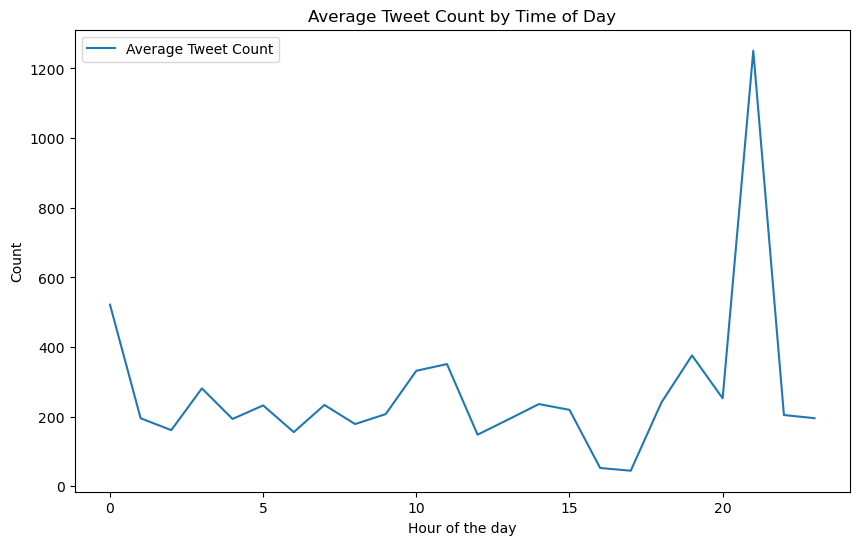

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' containing the data with columns 'created_at', 'tweet_count', 'followers_count', 'location', and 'time'

# Convert 'time' column to datetime format
log_data['time'] = pd.to_datetime(log_data['time'], format='%H:%M:%S')

# Calculate average tweet count and average follower count per time period
avg_tweet_count = log_data.groupby(log_data['time'].dt.hour)['tweet_count'].mean()

# Plot the average tweet count and average follower count over time
plt.figure(figsize=(10, 6))
plt.plot(avg_tweet_count.index, avg_tweet_count.values, label='Average Tweet Count')
plt.xlabel('Hour of the day')
plt.ylabel('Count')
plt.title('Average Tweet Count by Time of Day')
plt.legend()
plt.show()

<h1> more visuable version </h1>

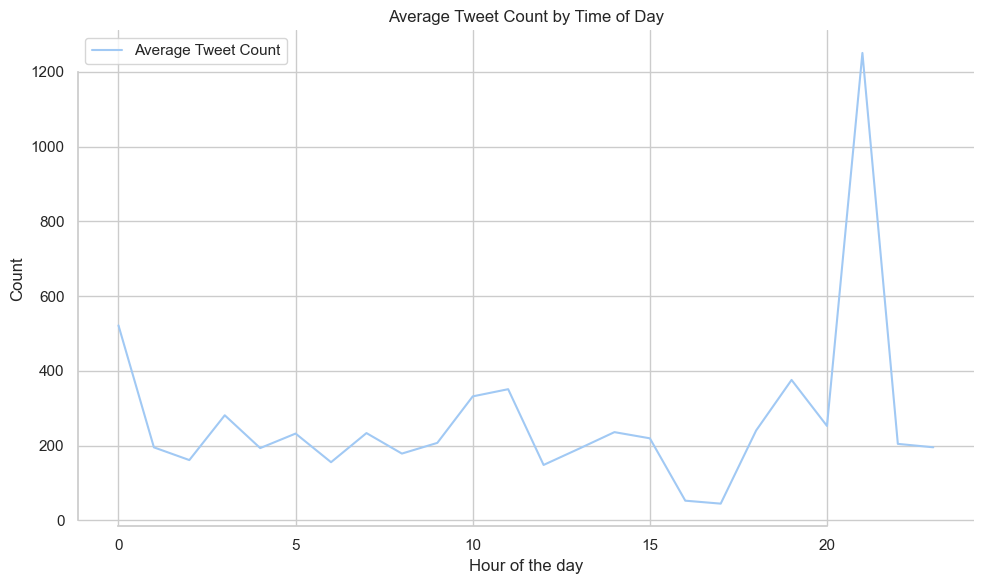

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' containing the data with columns 'created_at', 'tweet_count', 'followers_count', 'location', and 'time'

# Convert 'time' column to datetime format
log_data['time'] = pd.to_datetime(log_data['time'], format='%H:%M:%S')

# Calculate average tweet count per time period
avg_tweet_count = log_data.groupby(log_data['time'].dt.hour)['tweet_count'].mean()

# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Plot the average tweet count over time using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_tweet_count.index, y=avg_tweet_count.values, label='Average Tweet Count')
plt.xlabel('Hour of the day')
plt.ylabel('Count')
plt.title('Average Tweet Count by Time of Day')

# Customize the plot further, if desired
sns.despine(trim=True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

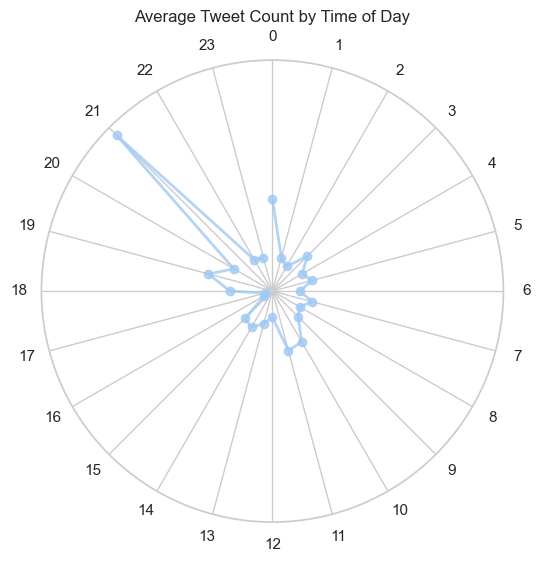

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' containing the data with columns 'created_at', 'tweet_count', 'followers_count', 'location', and 'time'

# Convert 'time' column to datetime format
log_data['time'] = pd.to_datetime(log_data['time'], format='%H:%M:%S')

# Calculate average tweet count per time period
avg_tweet_count = log_data.groupby(log_data['time'].dt.hour)['tweet_count'].mean()

# Convert hour values to radians for polar plot
theta = np.deg2rad(avg_tweet_count.index * 15)

# Set figure and axes for polar plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rticks([])

# Plot the average tweet count as cylinders
ax.plot(theta, avg_tweet_count.values, 'o-', linewidth=2, alpha=0.8)

# Customize the plot further, if desired
ax.set_xticks(theta)
ax.set_xticklabels(avg_tweet_count.index)
ax.set_title('Average Tweet Count by Time of Day')

# Show the plot
plt.show()


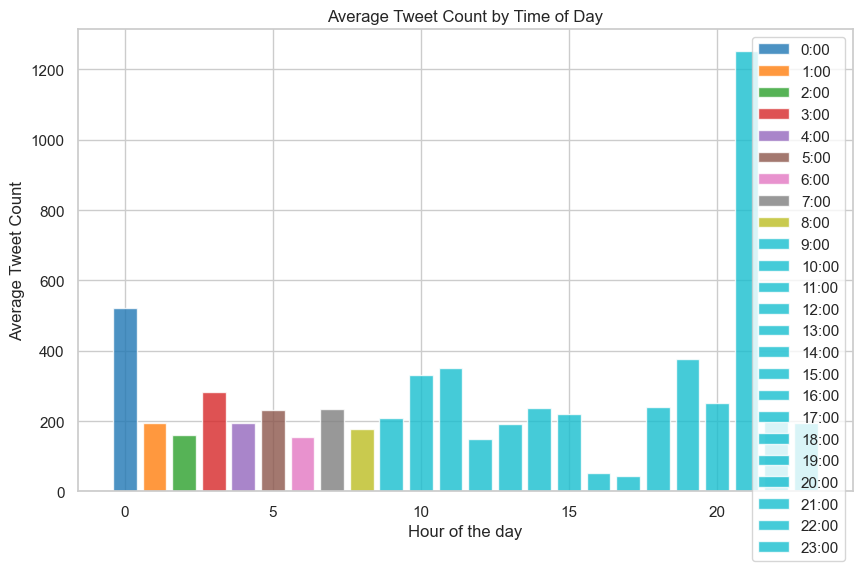

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming you have a DataFrame named 'data' containing the data with columns 'created_at', 'tweet_count', 'followers_count', 'location', and 'time'

# Convert 'time' column to datetime format
log_data['time'] = pd.to_datetime(log_data['time'], format='%H:%M:%S')

# Calculate average tweet count per time period
avg_tweet_count = log_data.groupby(log_data['time'].dt.hour)['tweet_count'].mean()

# Set the colormap for different time periods
cmap = cm.get_cmap('tab10')

# Create a figure and axis for the bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the average tweet count as a bar graph with different colors
bars = ax.bar(avg_tweet_count.index, avg_tweet_count.values, color=cmap(range(len(avg_tweet_count))), alpha=0.8)

# Customize the plot further, if desired
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Average Tweet Count')
ax.set_title('Average Tweet Count by Time of Day')

# Set the color labels for the legend
color_labels = [str(hour) + ':00' for hour in avg_tweet_count.index]

# Create a custom legend with the color labels
ax.legend(bars, color_labels, loc='best')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

log_data['time'] = pd.to_datetime(log_data['time'], format='%H:%M:%S')

avg_tweet_count = log_data.groupby(log_data['time'].dt.hour)['tweet_count'].mean()

cmap = cm.get_cmap('tab10')

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(avg_tweet_count.index, avg_tweet_count.values, color=cmap(range(len(avg_tweet_count))), alpha=0.8)

ax.set_xlabel('Hour of the day')
ax.set_ylabel('Average Tweet Count')
ax.set_title('Average Tweet Count by Time of Day')

color_labels = [str(hour) + ':00' for hour in avg_tweet_count.index]

ax.legend(bars, color_labels, loc='best')

plt.show()


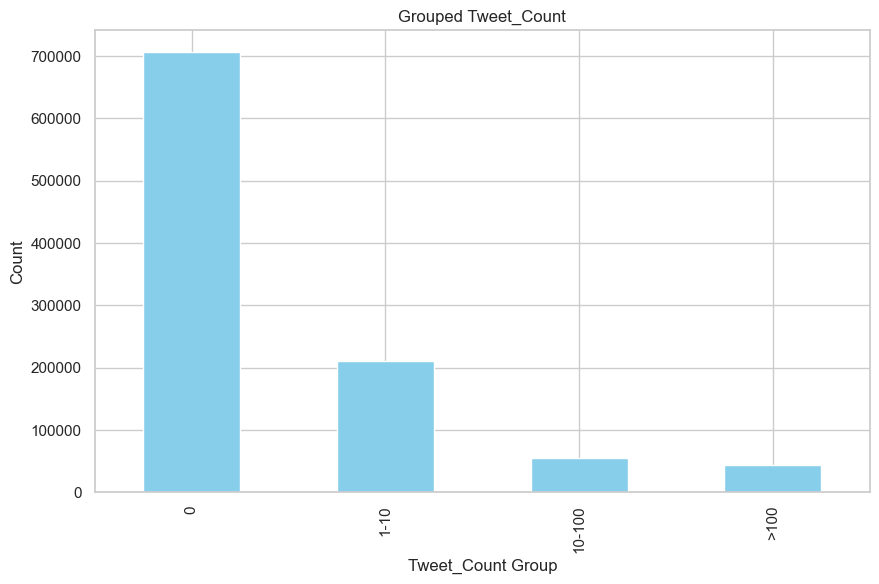

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' containing the data with column 'Tweet_Count'

# Define the group ranges for Tweet_Count
group_ranges = [0, 1, 10, 100, float('inf')]
group_labels = ['0', '1-10', '10-100', '>100']

# Group the data based on the Tweet_Count ranges
grouped_data = log_data.groupby(pd.cut(log_data['tweet_count'], bins=group_ranges, labels=group_labels, right=False)).size()

# Create a column graph to visualize the grouped data
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue')

# Add labels and title to the graph
plt.xlabel('Tweet_Count Group')
plt.ylabel('Count')
plt.title('Grouped Tweet_Count')

# Show the graph
plt.show()


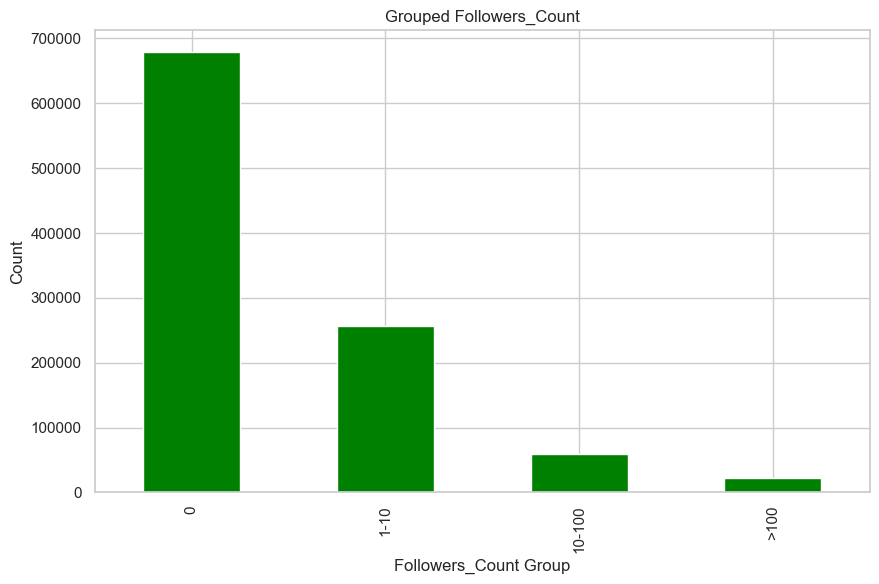

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' containing the data with column 'Followers_Count'

# Define the group ranges for Followers_Count
group_ranges = [0, 1, 10, 100, float('inf')]
group_labels = ['0', '1-10', '10-100', '>100']

# Group the data based on the Followers_Count ranges
grouped_data = log_data.groupby(pd.cut(log_data['followers_count'], bins=group_ranges, labels=group_labels, right=False)).size()

# Create a bar graph to visualize the grouped data
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='green')

# Add labels and title to the graph
plt.xlabel('Followers_Count Group')
plt.ylabel('Count')
plt.title('Grouped Followers_Count')

# Show the graph
plt.show()